# Pandas 

## Pandas의 특징

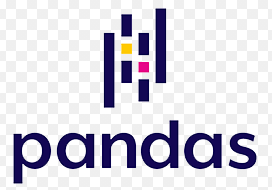

- 일반적으로 정형데이터(테이블 형식)을 다루기 위한 라이브러리

- 고성능 배열 계산 라이브러리인 numpy와 통합하여, 강력한 `스프레드시트` 처리 기능을 제공한다.

- 인덱싱, 연산용 함수, 전처리 함수등 을 제공하고, 이를 통해 데이터 처리 및 통계 분석을 위해 사용한다.

- 이를 하기 위해서 시리즈(Series)클래스, 데이터프레임(DataFrame)클래스를 제공한다.


[참고링크]

- [pandas User Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)
- [pandas github 사이트](https://github.com/pandas-dev/pandas)

- [데이터사이언스스쿨](https://datascienceschool.net/01%20python/04.00%204%EC%9E%A5%20%ED%8C%90%EB%8B%A4%EC%8A%A4%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D.html)

- [pandas cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

[Pandas 과제]

- [Pandas 10분 완성 따라하기, 원본](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
- [Pandas 10분 완성 따라하기, 번역](https://dataitgirls2.github.io/10minutes2pandas/)


## Pandas 라이브러리 임포트

In [1]:
import pandas as pd # pandas 라이브러리를 임포트할 때, pd로 별명을 지정해서 사용한다.
from pandas import Series, DataFrame

In [2]:
# 함수를 어떻게 사용했는지 기억이 안 날때,
# 인터넷에 검색해서 사용방법을 알아낼 수 있지만,
# help()를 이용해서 함수의 사용방법을 알 수 있다.

help(pd.Series.dtype)

Help on property:

    Return the dtype object of the underlying data.



## Pandas의 Series, DataFrame
- 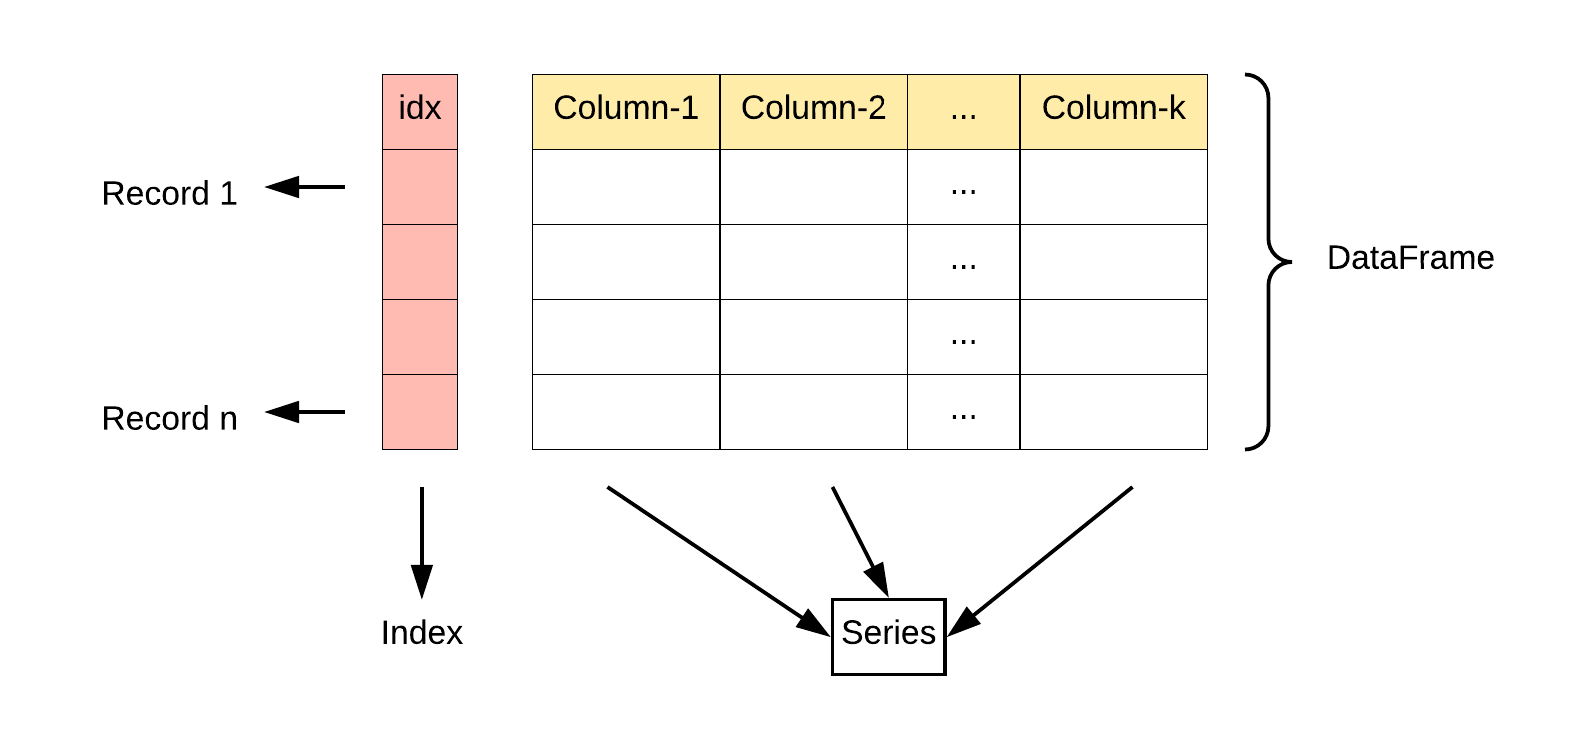

### 시리즈(Series) 클래스

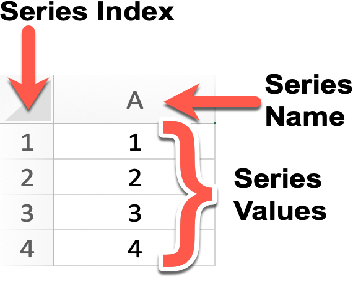
- Vector 데이터의 객체
- Series 클래스는 1차원 배열과 비슷하지만, 각각의 데이터의 의미를 나타내는 인덱스(index) 정보가 추가적으로 붙어 있다.
- 첫 번째열은 인덱스정보, 두 번째열은 데이터의 값이 저장되어 있다고 보면 된다.



In [3]:
# 1차원 배열 형태(리스트, Numpy 배열등)를 입력해서 시리즈 객체를 만들 수 있다.
# index를 입력하지 않으면, 0부터 시작하는 정수값(0, 1, 2 ...)으로 자동 생성된다.

data = [88, 92, 91,
        50, 47, 45, 45]
index = ['국어', '수학', '영어',
         '물리', '화학', '생물', '과학']

s = pd.Series(data, index=index)
s

국어    88
수학    92
영어    91
물리    50
화학    47
생물    45
과학    45
dtype: int64

- 시리즈의 인덱스는 `index` 속성으로 접근할 수 있다. -> index 객체를 반환

In [4]:
s.index, type(s.index)

(Index(['국어', '수학', '영어', '물리', '화학', '생물', '과학'], dtype='object'),
 pandas.core.indexes.base.Index)

- Series의 인덱스를 value(값) 형태로 가져오고 싶다면, `to_numpy()`를 사용

In [5]:
s.index.to_numpy()

array(['국어', '수학', '영어', '물리', '화학', '생물', '과학'], dtype=object)

- Series 값은 `values` 속성으로 접근할 수 있다. -> ndarray 객체를 반환한다.

In [6]:
s.values, type(s.values)

(array([88, 92, 91, 50, 47, 45, 45], dtype=int64), numpy.ndarray)

In [7]:
s = pd.Series(data)
s

0    88
1    92
2    91
3    50
4    47
5    45
6    45
dtype: int64

In [8]:
# 시리즈의 name 속성을 이용하면, 시리즈의 데이터에 이름을 붙일 수 있고,
# 시리즈의 index.name 속성을 이용하면, 시리즈의 인덱스에 이름을 붙일 수 있다.
# header를 지정하는 것이라고 생각하면 된다.

s = pd.Series(data, index=index)


s.name = '학생성적'
s.index.name = '과목', '점수'
s

(과목, 점수)
국어    88
수학    92
영어    91
물리    50
화학    47
생물    45
과학    45
Name: 학생성적, dtype: int64

### 데이터프레임(DataFrame) 클래스

- DataFrame 클래스는 2차원 배열과 비슷하며, 행렬 데이터에 인덱스 정보가 추가적으로 붙어 있다.

- DataFrame 클래스에는 행 인덱스 뿐만 아니라 열 인덱스 또한 붙일 수 있다.

- 열 인덱스는 컬럼명을 의미하고, 행 인덱스는 각 데이터의 의미 또는 행을 나타내는 것이라고 생각하면 된다.


In [9]:
# 데이터프레임 객체를 만들기 위해서, .csv등과 같은 파일을 읽어서 만드는 방법도 있지만,
# 여기서는 dictionary를 이용해서 데이터프레임 객체를 만들 것이다.


# dictionary의 Key에는 데이터에 대한 설명을 나타낼 수 있는 대표이름을 설정하고,
# dictionary의 Value에는 데이터를 집어 넣으면 된다.
data = {
    '국어': [88, 82, 74, 66, 55],
    '수학': [92, 84, 77, 68, 55],
    '영어': [81, 47, 43, 38, 29],
    '물리': [50, 47, 44, 40, 34],
    '화학': [47, 41, 36, 30, 24],
    '생물': [45, 40, 34, 27, 20],
    '과학': [45, 41, 38, 32, 21],
}

# columns에는 dictionary의 Key를 넣으면 된다.
# dictionary를 이용했을 때는 순서를 변경할 수도 있다.
#columns = ['물리', '화학','생물', '과학', '국어', '수학', '영어']

# index에는 샘플(표본)을 설명할 수 있는 값을 넣으면 된다.
# index를 입력하지 않으면, 0부터 시작하는 정수값(0, 1, 2 ...)으로 자동 생성된다.
index = ['홍길동', '김철수', '김영철', '최영미', '김수지']

df = pd.DataFrame(data, index=index)
df

,국어,수학,영어,물리,화학,생물,과학
홍길동,88,92,81,50,47,45,45
김철수,82,84,47,47,41,40,41
김영철,74,77,43,44,36,34,38
최영미,66,68,38,40,30,27,32
김수지,55,55,29,34,24,20,21


In [10]:
# list 또는 ndarray를 이용해서 데이터프레임 객체를 만들 수도 있다.
# 이때는 열벡터를 이용해서 만드는 것이 아니라, 행벡터를 이용해서 만들어야 한다.
data = [
        [88, 92, 81, 50, 47, 45, 45],
        [82, 84, 47, 47, 41, 40, 41],
        [74, 77, 43, 44, 36, 34, 38],
        [66, 68, 38, 40, 30, 27, 32],
        [55, 55, 29, 34, 24, 20, 21]]

# columns에는 dictionary의 Key를 넣으면 된다. (데이터를 딕셔너리 형태로 집어 넣지 않았을 때)
columns = ['국어', '수학', '영어', '물리', '화학','생물', '과학']

# index에는 샘플(표본)을 설명할 수 있는 값을 넣으면 된다.
# index를 입력하지 않으면, 0부터 시작하는 정수값(0, 1, 2 ...)으로 자동 생성된다.
index = ['홍길동', '김철수', '김영철', '최영미', '김수지']

df = pd.DataFrame(data, index=index, columns=columns)
df

,국어,수학,영어,물리,화학,생물,과학
홍길동,88,92,81,50,47,45,45
김철수,82,84,47,47,41,40,41
김영철,74,77,43,44,36,34,38
최영미,66,68,38,40,30,27,32
김수지,55,55,29,34,24,20,21


In [11]:
data = [
        [88, 92, 81, 50, 47, 45, 45],
        [82, 84, 47, 47, 41, 40, 41],
        [74, 77, 43, 44, 36, 34, 38],
        [66, 68, 38, 40, 30, 27, 32],
        [55, 55, 29, 34, 24, 20, 21]]

df = pd.DataFrame(data, index=['홍길동', '김철수', '김영철', '최영미', '김수지'], 
                  columns=['국어', '수학', '영어', '물리', '화학','생물', '과학'])

df

,국어,수학,영어,물리,화학,생물,과학
홍길동,88,92,81,50,47,45,45
김철수,82,84,47,47,41,40,41
김영철,74,77,43,44,36,34,38
최영미,66,68,38,40,30,27,32
김수지,55,55,29,34,24,20,21


In [12]:
# list 또는 ndarray의 열벡터(1차원 배열)를 이용해서
# zip을 통해서 묶어서, 만들 수도 있다.


korean = [88, 82, 74, 66, 55]
math = [92, 84, 77, 68, 55]
english = [81, 47, 43, 38, 29]
physics = [50, 47, 44, 40, 34]
chemistry = [47, 41, 36, 30, 24]
biology = [45, 40, 34, 27, 20]
earth = [45, 41, 38, 32, 21]

# columns에는 dictionary의 Key를 넣으면 된다. (데이터를 딕셔너리 형태로 집어 넣지 않았을 때)
columns = ['국어', '수학', '영어', '물리', '화학','생물', '과학']

# index에는 샘플(표본)을 설명할 수 있는 값을 넣으면 된다.
# index를 입력하지 않으면, 0부터 시작하는 정수값(0, 1, 2 ...)으로 자동 생성된다.
index = ['홍길동', '김철수', '김영철', '최영미', '김수지']

df = pd.DataFrame(zip(korean, math, english, physics, chemistry, biology, earth), index=index, columns=columns)
df

,국어,수학,영어,물리,화학,생물,과학
홍길동,88,92,81,50,47,45,45
김철수,82,84,47,47,41,40,41
김영철,74,77,43,44,36,34,38
최영미,66,68,38,40,30,27,32
김수지,55,55,29,34,24,20,21


- 데이터프레임의 인덱스는 열방향 인덱스 `columns`, 행방향 인덱스 `index` 속성으로 접근할 수 있다.

In [13]:
df.columns 

Index(['국어', '수학', '영어', '물리', '화학', '생물', '과학'], dtype='object')

In [14]:
df.index

Index(['홍길동', '김철수', '김영철', '최영미', '김수지'], dtype='object')

- 데이터프레임의 인덱스를 value(값) 형태로 가져오고 싶다면, `to_numpy()`를 사용하면 된다.

In [15]:
df.columns.to_numpy() 

array(['국어', '수학', '영어', '물리', '화학', '생물', '과학'], dtype=object)

In [16]:
df.index.to_numpy()

array(['홍길동', '김철수', '김영철', '최영미', '김수지'], dtype=object)

- 데이터프레임의 값은 `values` 속성으로 접근할 수 있다. -> ndarray 객체를 반환한다.

In [17]:
df.values

array([[88, 92, 81, 50, 47, 45, 45],
       [82, 84, 47, 47, 41, 40, 41],
       [74, 77, 43, 44, 36, 34, 38],
       [66, 68, 38, 40, 30, 27, 32],
       [55, 55, 29, 34, 24, 20, 21]], dtype=int64)

- 데이터프레임의 name 속성을 이용하면, 데이터프레임의 행방향 인데스, 열방향 인덱스에 이름을 붙일 수 있다.

In [18]:
df.index.name = '학생이름' # 행방향 인덱스의 경우
df.columns.name = '과목성적' # 열방향 인덱스의 경우 
df

과목성적,국어,수학,영어,물리,화학,생물,과학
학생이름,,,,,,,
홍길동,88,92,81,50,47,45,45
김철수,82,84,47,47,41,40,41
김영철,74,77,43,44,36,34,38
최영미,66,68,38,40,30,27,32
김수지,55,55,29,34,24,20,21


## Pandas의 데이터 타입

- Pandas에는 NumPy에서 사용되는 타입, 파이썬에서 사용되는 타입과 대응되는 7개의 타입이 존재한다.

- category는 

![overview of Pandas Data Types](https://pbpython.com/images/pandas_dtypes.png)

In [19]:
df = pd.DataFrame({
    'object': ['It is string type'], # 문자열은 object 타입
    'int': [2021], # 정수값은 int 타입
    'float': [3.14], # 실수값은 float 타입
    'bool': [True], # 논리값은 bool 타입
    'datetime': [pd.Timestamp('20210323')], # 시간은 datetime 타입
    'timedelta': [pd.Timestamp('20210301') - pd.Timestamp('20210323')], # 시간차는 timedelta 타입
    'category': pd.Series(['cat'], dtype='category') # category타입은 dtype을 통해서 직접 지정을 해야된다.
    })

df.dtypes

object                object
int                    int64
float                float64
bool                    bool
datetime      datetime64[ns]
timedelta    timedelta64[ns]
category            category
dtype: object

- Python datetime Module
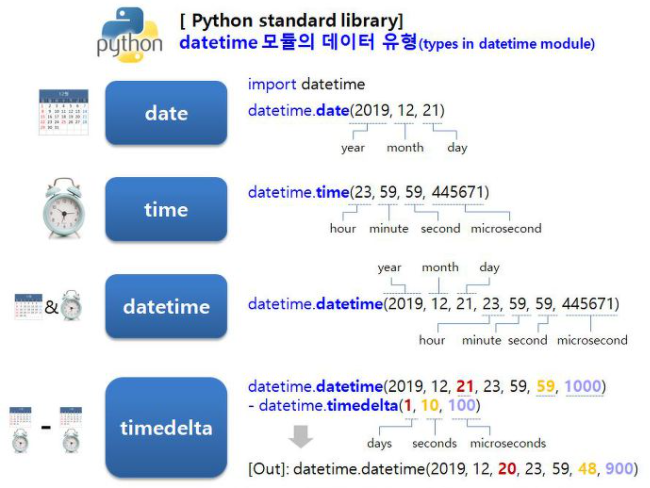

In [20]:
import datetime as dt

mydate = dt.datetime.now()
print(mydate)

print('year:', mydate.year)
print('month:', mydate.month)
print('day:', mydate.day)

nowDatetime = mydate.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2021-04-08 22:37:28.123036
year: 2021
month: 4
day: 8
2021-04-08 22:37:28


## Pandas 기본적인 사용법

### 시리즈(Series)

#### 시리즈(Series) 연산

- Numpy 배열처럼 벡터화 연산이 가능하다.

In [21]:
# 아래의 데이터를 사용
data1 = [88, 92, 91, 50, 47, 45, 45]
data2 = [82, 84, 47, 47, 41, 40, 41]
index = ['국어', '수학', '영어', '물리', '화학', '생물', '과학']
s1 = pd.Series(data1, index=index)
s2 = pd.Series(data2, index=index)

print(s1)
print(s2)

국어    88
수학    92
영어    91
물리    50
화학    47
생물    45
과학    45
dtype: int64
국어    82
수학    84
영어    47
물리    47
화학    41
생물    40
과학    41
dtype: int64


In [22]:
# add
s1 + 5

국어    93
수학    97
영어    96
물리    55
화학    52
생물    50
과학    50
dtype: int64

In [23]:
# sub
s1 - 5

국어    83
수학    87
영어    86
물리    45
화학    42
생물    40
과학    40
dtype: int64

In [24]:
# Mul
s1 * 5

국어    440
수학    460
영어    455
물리    250
화학    235
생물    225
과학    225
dtype: int64

In [25]:
# div
s1 / 5

국어    17.6
수학    18.4
영어    18.2
물리    10.0
화학     9.4
생물     9.0
과학     9.0
dtype: float64

In [26]:
# 시리즈끼리 더하기
s1 + s2

국어    170
수학    176
영어    138
물리     97
화학     88
생물     85
과학     86
dtype: int64

In [27]:
# 시리즈끼리 빼기
s1 - s2

국어     6
수학     8
영어    44
물리     3
화학     6
생물     5
과학     4
dtype: int64

In [28]:
# 시리즈끼리 곱하기
s1 * s2

국어    7216
수학    7728
영어    4277
물리    2350
화학    1927
생물    1800
과학    1845
dtype: int64

In [29]:
# 시리즈끼리 나누기
s1 / s2

국어    1.073171
수학    1.095238
영어    1.936170
물리    1.063830
화학    1.146341
생물    1.125000
과학    1.097561
dtype: float64

#### 시리즈(Series) 인덱싱

In [30]:
data = [88, 92, 91, 50, 47, 45, 45]
index = ['국어', '수학', '영어', '물리', '화학', '생물', '과학']
s = pd.Series(data, index=index)
s

국어    88
수학    92
영어    91
물리    50
화학    47
생물    45
과학    45
dtype: int64

- 배열에서 사용가능한 인덱스를 그대로 시리즈 객체에 사용할 수 있다.

In [31]:
s[0], s[1], s[2], s[3], s[4], s[5], s[6]

(88, 92, 91, 50, 47, 45, 45)

- 인덱스를 이용한 인덱싱

In [32]:
s['국어'], s['수학'], s['영어'], s['물리'], s['화학'], s['생물'], s['과학']

(88, 92, 91, 50, 47, 45, 45)

- 배열 형태의 슬라이싱

In [33]:
s[:4]

국어    88
수학    92
영어    91
물리    50
dtype: int64

- 인덱스를 이용한 슬라이싱도 가능하다.
- 인덱스를 사용해서 슬라이싱할 경우, 끝의 데이터도 포함

In [34]:
s['국어':'화학']

국어    88
수학    92
영어    91
물리    50
화학    47
dtype: int64

- Numpy에서 list를 이용해서 필요한 부분만 추출했던 것처럼 Pandas도 가능

In [35]:
s[[0, 2, 4, 6]]

국어    88
영어    91
화학    47
과학    45
dtype: int64

- 인덱스를 이용해서, 필요한 부분만 추출이 가능하다.

In [36]:
s[['국어', '영어', '화학', '과학']]

국어    88
영어    91
화학    47
과학    45
dtype: int64

- Numpy처럼 불리언 인덱싱이 가능하다.

In [37]:
s[(s > 90)]

수학    92
영어    91
dtype: int64

- indexer -> [], 를 이용하는 것이 아니라, 인덱스를 속성처럼 사용해서 데이터에 접근할 수도 있다.

In [38]:
s.국어, s.수학, s.영어, s.물리, s.화학, s.생물, s.과학

(88, 92, 91, 50, 47, 45, 45)

#### 시리즈에서 데이터 추가, 삭제

In [39]:
data = [88, 92, 91, 50, 47, 45, 45]
index = ['국어', '수학', '영어', '물리', '화학', '생물', '과학']
s = pd.Series(data, index=index)
s

국어    88
수학    92
영어    91
물리    50
화학    47
생물    45
과학    45
dtype: int64

In [40]:
# dictionary처럼 데이터를 추가 및 업데이트를 할 수 있다.
s['국어'] = 100 # 데이터가 존재하는 경우, 속성을 이용해서 갱신할 수도 있다. ex) s.국어 = 100
s['체육'] = 50
s

국어    100
수학     92
영어     91
물리     50
화학     47
생물     45
과학     45
체육     50
dtype: int64

In [41]:
# 데이터를 삭제할 때는 del 명령을 사용한다.
del s['체육']
s

국어    100
수학     92
영어     91
물리     50
화학     47
생물     45
과학     45
dtype: int64

### 데이터프레임(DataFrame)

#### 데이터프레임(DataFrame) 인덱싱

In [42]:
# 아래의 데이터를 사용
data = {
    '국어': [88, 82, 74, 66, 55],
    '수학': [92, 84, 77, 68, 55],
    '영어': [81, 47, 43, 38, 29],
    '물리': [50, 47, 44, 40, 34],
    '화학': [47, 41, 36, 30, 24],
    '생물': [45, 40, 34, 27, 20],
    '과학': [45, 41, 38, 32, 21],
}
columns = ['물리', '화학','생물', '과학', '국어', '수학', '영어']
index = ['홍길동', '김철수', '김영철', '최영미', '김수지']
df = pd.DataFrame(data, index=index, columns=columns)
df

,물리,화학,생물,과학,국어,수학,영어
홍길동,50,47,45,45,88,92,81
김철수,47,41,40,41,82,84,47
김영철,44,36,34,38,74,77,43
최영미,40,30,27,32,66,68,38
김수지,34,24,20,21,55,55,29


In [43]:
# 열을 이용해서 인덱싱할 수 있다. -> 시리즈가 반환된다.
df['물리']

홍길동    50
김철수    47
김영철    44
최영미    40
김수지    34
Name: 물리, dtype: int64

In [44]:
# 배열을 이용해서 필요한 부분을 인덱싱할 수 있다. -> 데이터프레임이 반환된다.
df[['국어', '수학', '영어']]

,국어,수학,영어
홍길동,88,92,81
김철수,82,84,47
김영철,74,77,43
최영미,66,68,38
김수지,55,55,29


In [45]:
# 데이터 프레임을 반환하기 위해서, 일부러 배열을 이용할 수도 있다.
df[['국어']]

,국어
홍길동,88
김철수,82
김영철,74
최영미,66
김수지,55


In [46]:
# 행 인덱싱을 하기 위해서, 정수 슬라이싱을 사용한다.
df[:3]

,물리,화학,생물,과학,국어,수학,영어
홍길동,50,47,45,45,88,92,81
김철수,47,41,40,41,82,84,47
김영철,44,36,34,38,74,77,43


In [47]:
# 행 인덱스를 가지고 슬라이싱을 할 수 있다.
df[:'김영철']

,물리,화학,생물,과학,국어,수학,영어
홍길동,50,47,45,45,88,92,81
김철수,47,41,40,41,82,84,47
김영철,44,36,34,38,74,77,43


#### 데이터프레임(DataFrame)에서 데이터 추가,삭제

In [48]:
# 아래의 데이터를 사용
data = {
    '국어': [88, 82, 74, 66, 55],
    '수학': [92, 84, 77, 68, 55],
    '영어': [81, 47, 43, 38, 29],
    '물리': [50, 47, 44, 40, 34],
    '화학': [47, 41, 36, 30, 24],
    '생물': [45, 40, 34, 27, 20],
    '과학': [45, 41, 38, 32, 21],
}
columns = ['물리', '화학','생물', '과학', '국어', '수학', '영어']
index = ['홍길동', '김철수', '김영철', '최영미', '김수지']
df = pd.DataFrame(data, index=index, columns=columns)
df

,물리,화학,생물,과학,국어,수학,영어
홍길동,50,47,45,45,88,92,81
김철수,47,41,40,41,82,84,47
김영철,44,36,34,38,74,77,43
최영미,40,30,27,32,66,68,38
김수지,34,24,20,21,55,55,29


- 통계 함수
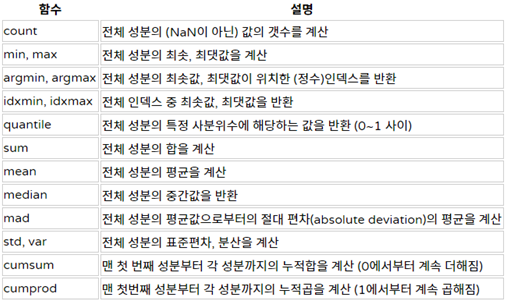

In [49]:
# dictionary처럼 데이터를 추가 및 업데이트를 할 수 있다.
# 데이터프레임의 경우, 열의 크기를 맞춰줘야 한다.
df['평균'] = df.mean(axis = 1)
df

,물리,화학,생물,과학,국어,수학,영어,평균
홍길동,50,47,45,45,88,92,81,64.000000
김철수,47,41,40,41,82,84,47,54.571429
김영철,44,36,34,38,74,77,43,49.428571
최영미,40,30,27,32,66,68,38,43.000000
김수지,34,24,20,21,55,55,29,34.000000


In [50]:
a = df.mean(axis = 0)
a

물리    43.0
화학    35.6
생물    33.2
과학    35.4
국어    73.0
수학    75.2
영어    47.6
평균    49.0
dtype: float64

In [51]:
# 데이터를 삭제할 때는 del 명령을 사용한다. -> df.drop을 통해서도 가능하다. 뒤에서 설명
del df['평균']
df

,물리,화학,생물,과학,국어,수학,영어
홍길동,50,47,45,45,88,92,81
김철수,47,41,40,41,82,84,47
김영철,44,36,34,38,74,77,43
최영미,40,30,27,32,66,68,38
김수지,34,24,20,21,55,55,29


In [52]:
df2 = np.transpose(df)
df2

df2['평균'] = df2.mean(axis = 1)
df2

,홍길동,김철수,김영철,최영미,김수지,평균
물리,50,47,44,40,34,43.0
화학,47,41,36,30,24,35.6
생물,45,40,34,27,20,33.2
과학,45,41,38,32,21,35.4
국어,88,82,74,66,55,73.0
수학,92,84,77,68,55,75.2
영어,81,47,43,38,29,47.6


## Pandas 데이터 입출력

- Pandas에는 [다양한 입출력 포맷](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)이 있지만, 그중 CSV에 대해서 간단하게 소개할 것이다.



In [53]:
# 아래의 데이터를 사용
data = {
    '국어': [88, 82, 74, 66, 55],
    '수학': [92, 84, 77, 68, 55],
    '영어': [81, 47, 43, 38, 29],
    '물리': [50, 47, 44, 40, 34],
    '화학': [47, 41, 36, 30, 24],
    '생물': [45, 40, 34, 27, 20],
    '과학': [45, 41, 38, 32, 21],
}
columns = ['물리', '화학','생물', '과학', '국어', '수학', '영어']
index = ['홍길동', '김철수', '김영철', '최영미', '김수지']
df = pd.DataFrame(data, index=index, columns=columns)
df

,물리,화학,생물,과학,국어,수학,영어
홍길동,50,47,45,45,88,92,81
김철수,47,41,40,41,82,84,47
김영철,44,36,34,38,74,77,43
최영미,40,30,27,32,66,68,38
김수지,34,24,20,21,55,55,29


In [54]:
# df.to_csv() 메서드를 사용해서, 데이터프레임을 csv 파일 형식으로 저장할 수 있다.
df.to_csv('sample.csv')

In [55]:
# pd.read_csv() 메서드를 사용해서, csv 파일 형식을 읽어서, 데이터프레임을 생성할 수 있다.
df = pd.read_csv('sample.csv', index_col=0) # index_col은 행 인덱스로 사용할 컬럼을 정수 인덱스 또는 문자열로 지정한다.
df

,물리,화학,생물,과학,국어,수학,영어
홍길동,50,47,45,45,88,92,81
김철수,47,41,40,41,82,84,47
김영철,44,36,34,38,74,77,43
최영미,40,30,27,32,66,68,38
김수지,34,24,20,21,55,55,29


## Pandas 고급 인덱싱

- Numpy처럼 2차원 인덱싱을 지원하기 위해서 인덱서(indexer)를 지원한다.

- **loc**, **iloc**, **at**, **iat** 가 이에 해당한다.

### loc 인덱서

loc 인덱서는 기본적으로 인덱스를 사용해서 인덱싱을 하지만, 불리언 배열을 사용해서 인덱싱할 수 있다.

- 인덱스
- 인덱스 배열
- 인덱스 슬라이스
- 인덱싱되는 축과 길이가 같은 불리언 배열

기본적인 사용법은 다음과 같다.

```
df.loc[행 인덱스]
```

또는

```
df.loc[행 인덱스, 열 인덱스]
```


In [56]:
# 아래의 데이터를 사용
data = {
    '국어': [88, 82, 74, 66, 55],
    '수학': [92, 84, 77, 68, 55],
    '영어': [81, 47, 43, 38, 29],
    '물리': [50, 47, 44, 40, 34],
    '화학': [47, 41, 36, 30, 24],
    '생물': [45, 40, 34, 27, 20],
    '과학': [45, 41, 38, 32, 21],
}
columns = ['물리', '화학','생물', '과학', '국어', '수학', '영어']
index = ['홍길동', '김철수', '김영철', '최영미', '김수지']
df = pd.DataFrame(data, index=index, columns=columns)
df

,물리,화학,생물,과학,국어,수학,영어
홍길동,50,47,45,45,88,92,81
김철수,47,41,40,41,82,84,47
김영철,44,36,34,38,74,77,43
최영미,40,30,27,32,66,68,38
김수지,34,24,20,21,55,55,29


In [57]:
# 행 인덱스만을 사용하면, 시리즈를 반환한다.
df.loc['홍길동']

물리    50
화학    47
생물    45
과학    45
국어    88
수학    92
영어    81
Name: 홍길동, dtype: int64

In [58]:
# 행 인덱스 배열을 사용하면, 데이터프레임을 반환한다.
df.loc[['홍길동', '김철수']]

,물리,화학,생물,과학,국어,수학,영어
홍길동,50,47,45,45,88,92,81
김철수,47,41,40,41,82,84,47


In [59]:
# 행 인덱스 슬라이스를 사용하면, 데이터프레임을 반환한다. 
df.loc['홍길동':'김영철']

,물리,화학,생물,과학,국어,수학,영어
홍길동,50,47,45,45,88,92,81
김철수,47,41,40,41,82,84,47
김영철,44,36,34,38,74,77,43


In [60]:
# 행 인덱스와, 열 인덱스을 모두 사용할 경우, 해당 위치의 값을 반환한다.
df.loc['홍길동', '물리']

50

In [61]:
# 행 인덱스와, 열인덱스를 모두 사용할 때, 슬라이싱 또는 배열 또는 불리언 배열 또는 인덱스 모두 섞어서 사용할 수 있다.

df.loc['홍길동', '물리':'생물'] # 행 인덱스, 열 인덱스 슬라이싱의 경우

물리    50
화학    47
생물    45
Name: 홍길동, dtype: int64

In [62]:
df.loc['홍길동', ['물리', '생물']] # 행 인덱스, 열 인덱스 배열의 경우

물리    50
생물    45
Name: 홍길동, dtype: int64

In [63]:
df.loc['홍길동', [True, False, True, False, True, False, True]] # 행 인덱스, 불리언 배열의 경우 

물리    50
생물    45
국어    88
영어    81
Name: 홍길동, dtype: int64

In [64]:
df.loc['홍길동':'최영미', '물리'] # 행 인덱스 슬라이스, 열 인덱스의 경우

홍길동    50
김철수    47
김영철    44
최영미    40
Name: 물리, dtype: int64

In [65]:
df.loc[['홍길동', '김철수'], '물리'] # 행 인덱스 배열, 열 인덱스의 경우

홍길동    50
김철수    47
Name: 물리, dtype: int64

In [66]:
df.loc[[True, False, True, False, True], '물리'] # 불리언 배열, 열 인덱스의 경우

홍길동    50
김영철    44
김수지    34
Name: 물리, dtype: int64

### iloc 인덱서

iloc 인덱서는 기본적으로 정수를 사용해서 인덱싱을 한다.

- 인덱스
- 인덱스 배열
- 인덱스 슬라이스

기본적인 사용법은 다음과 같다.

```
df.iloc[행 인덱스]
```

또는

```
df.iloc[행 인덱스, 열 인덱스]
```

In [67]:
# 아래의 데이터를 사용
data = {
    '국어': [88, 82, 74, 66, 55],
    '수학': [92, 84, 77, 68, 55],
    '영어': [81, 47, 43, 38, 29],
    '물리': [50, 47, 44, 40, 34],
    '화학': [47, 41, 36, 30, 24],
    '생물': [45, 40, 34, 27, 20],
    '과학': [45, 41, 38, 32, 21],
}
columns = ['물리', '화학','생물', '과학', '국어', '수학', '영어']
index = ['홍길동', '김철수', '김영철', '최영미', '김수지']
df = pd.DataFrame(data, index=index, columns=columns)
df

,물리,화학,생물,과학,국어,수학,영어
홍길동,50,47,45,45,88,92,81
김철수,47,41,40,41,82,84,47
김영철,44,36,34,38,74,77,43
최영미,40,30,27,32,66,68,38
김수지,34,24,20,21,55,55,29


In [68]:
# 행 인덱스만을 사용하면, 시리즈를 반환한다.
df.iloc[0]

물리    50
화학    47
생물    45
과학    45
국어    88
수학    92
영어    81
Name: 홍길동, dtype: int64

In [69]:
# 행 인덱스 배열을 사용하면, 데이터프레임을 반환한다.
df.iloc[[0, 1]]

,물리,화학,생물,과학,국어,수학,영어
홍길동,50,47,45,45,88,92,81
김철수,47,41,40,41,82,84,47


In [70]:
# 행 인덱스 슬라이스를 사용하면, 데이터프레임을 반환한다.
df.iloc[0:3]

,물리,화학,생물,과학,국어,수학,영어
홍길동,50,47,45,45,88,92,81
김철수,47,41,40,41,82,84,47
김영철,44,36,34,38,74,77,43


In [71]:
# 행 인덱스와 열 인덱스를 모두 사용할 경우, 해당 위치의 값을 반환한다.
df.iloc[0, 0]

50

In [72]:
# 행 인덱스와, 열 인덱스를 모두 사용할 때, 슬라이싱 또는 배열 또는 인덱스 모두 섞어서 사용할 수 있다.

df.iloc[0, 0:3] # 행 인덱스, 열 인덱스 슬라이스의 경우

물리    50
화학    47
생물    45
Name: 홍길동, dtype: int64

In [73]:
df.iloc[0, [0, 2]] # 행 인덱스, 열 인덱스 배열의 경우

물리    50
생물    45
Name: 홍길동, dtype: int64

In [74]:
df.iloc[0:2, 0] # 행 인덱스 슬라이스, 열 인덱스의 경우

홍길동    50
김철수    47
Name: 물리, dtype: int64

In [75]:
df.iloc[[0, 1], 0] # 행 인덱스 배열, 열 인덱스의 경우

홍길동    50
김철수    47
Name: 물리, dtype: int64

### at 인덱서 와 iat 인덱서

at 인덱서와 iat 인덱서는 단일 값을 가져올 때 또는 단일 값을 업데이트할 때 사용한다. (loc, iloc 보다 속도가 빠르기 때문)

기본적인 사용 방법은 다음과 같다.

```
df.at[행 인덱스, 열 인덱스] -> 레이블을 사용
```

```
df.iat[행 인덱스, 열 인덱스] -> 정수값을 사용
```

In [76]:
# 아래의 데이터를 사용
data = {
    '국어': [88, 82, 74, 66, 55],
    '수학': [92, 84, 77, 68, 55],
    '영어': [81, 47, 43, 38, 29],
    '물리': [50, 47, 44, 40, 34],
    '화학': [47, 41, 36, 30, 24],
    '생물': [45, 40, 34, 27, 20],
    '과학': [45, 41, 38, 32, 21],
}
columns = ['물리', '화학','생물', '과학', '국어', '수학', '영어']
index = ['홍길동', '김철수', '김영철', '최영미', '김수지']
df = pd.DataFrame(data, index=index, columns=columns)
df

,물리,화학,생물,과학,국어,수학,영어
홍길동,50,47,45,45,88,92,81
김철수,47,41,40,41,82,84,47
김영철,44,36,34,38,74,77,43
최영미,40,30,27,32,66,68,38
김수지,34,24,20,21,55,55,29


In [77]:
df.at['홍길동','물리']

50

In [78]:
df.iat[0,0]

50